### Imports

In [1]:
from Parser import main as parser
from Extractor.extractor import guess_key

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand

### Pandas config

In [2]:
# not necesarry when outputting with df.style
# pd.set_option('display.width', 1200)
# pd.set_option('display.max_rows', 30)
# pd.set_option('max_colwidth', 15)

### Parsing of data from .txt files

get.songs() takes in following parameres : 
- glob path to files to parse,
- True if we want the file name printed (optional)
- genre name for the song in the choosen glob path **kwargs "genre="

In [3]:
# parses all songs in choosen directory
def parse_section(dir_name, songs):
    print(f'\n\n======== parsing {dir_name} songs ========\n')
    dir_songs = parser.get_songs(f'Songs/{dir_name}/*.txt', True, genre=dir_name)
    songs += dir_songs
    print(f'\n======== parsed {len(dir_songs)} {dir_name} songs ========')
    

In [4]:
# initializes songs array
songs = []

# array of directory names
# dir_names = ['classical','metal','rock','pop','_unclassified']
dir_names = ['classical','metal','rock','pop']

# parse for each directory
for dn in dir_names:
    parse_section(dn, songs)



======== parsing classical songs ========

now parsing "Songs/classical\alice-concerto.txt"
now parsing "Songs/classical\Bach-Air1.txt"
now parsing "Songs/classical\Beethoven-Rondo In C1.txt"
now parsing "Songs/classical\Beethoven-Sonata quasi una Fantasia (MOONLIGHT) Op. 27, No. 21.txt"
now parsing "Songs/classical\Chopin-Prelude  No. 6, Opus 28.txt"
now parsing "Songs/classical\Claude Debussey-La Fille Aux Cheveaux de Lin.txt"
now parsing "Songs/classical\Claude Debussy-Jimbo's Lullaby.txt"
now parsing "Songs/classical\converted-Dan-Mumm.gpx.txt"
now parsing "Songs/classical\converted-Frederic Chopin - Etude Op10 No3 (Pro).gp5.txt"
now parsing "Songs/classical\converted-Invention 4.gpx.txt"
now parsing "Songs/classical\converted-Johann Sebastian Bach - Cello Suite No 1 - Prelude (Pro).gp5.txt"
now parsing "Songs/classical\converted-Johann Sebastian Bach - Jesu Joy Of Mans Desiring (Pro).gpx.txt"
now parsing "Songs/classical\converted-Ludwig Van Beethoven - Temptest Sonata 3rd Movem

now parsing "Songs/rock\converted-3606376.gp5.txt"
now parsing "Songs/rock\converted-3606399.gp5.txt"
now parsing "Songs/rock\converted-3606620.gp5.txt"
now parsing "Songs/rock\converted-3606875.gp5.txt"
now parsing "Songs/rock\converted-3606947.gp5.txt"
now parsing "Songs/rock\converted-3606974.gp5.txt"
now parsing "Songs/rock\converted-3607161.gp5.txt"
now parsing "Songs/rock\converted-3607397.gp5.txt"
now parsing "Songs/rock\converted-3607781.gp5.txt"
now parsing "Songs/rock\converted-3609167.gp5.txt"
now parsing "Songs/rock\converted-3611606.gp5.txt"
now parsing "Songs/rock\converted-3611609.gp5.txt"
now parsing "Songs/rock\converted-3611671.gp5.txt"
now parsing "Songs/rock\converted-3611736.gp5.txt"
now parsing "Songs/rock\converted-3611882.gp5.txt"
now parsing "Songs/rock\converted-3617426.gp5.txt"
now parsing "Songs/rock\converted-3617492.gp5.txt"
now parsing "Songs/rock\converted-3617532.gp5.txt"
now parsing "Songs/rock\converted-3617756.gp5.txt"
now parsing "Songs/rock\convert

now parsing "Songs/pop\converted-10459302.gp5.txt"
now parsing "Songs/pop\converted-10473186.gp5.txt"
now parsing "Songs/pop\converted-10572889.gp5.txt"
now parsing "Songs/pop\converted-11472909.gp5.txt"
now parsing "Songs/pop\converted-11492487.gp5.txt"
now parsing "Songs/pop\converted-11575714.gp5.txt"
now parsing "Songs/pop\converted-11657640.gp5.txt"
now parsing "Songs/pop\converted-3605183.gp5.txt"
now parsing "Songs/pop\converted-3605193.gp5.txt"
now parsing "Songs/pop\converted-3606888.gp5.txt"
now parsing "Songs/pop\converted-3607010.gp5.txt"
now parsing "Songs/pop\converted-3610690.gp5.txt"
now parsing "Songs/pop\converted-3610768.gp5.txt"
now parsing "Songs/pop\converted-3610825.gp5.txt"
now parsing "Songs/pop\converted-3610829.gp5.txt"
now parsing "Songs/pop\converted-3610834.gp5 (1).txt"
now parsing "Songs/pop\converted-3610834.gp5.txt"
now parsing "Songs/pop\converted-3610840.gp5.txt"
now parsing "Songs/pop\converted-3610957.gp5.txt"
now parsing "Songs/pop\converted-361096

### Display of sample values

In [5]:
print(f'Succesfully parsed {len(songs)} song(s).\n')
print('Song\'s print_with_tracks() method displays this:\n')
songs[rand.randint(0,len(songs))].print_with_tracks()

Succesfully parsed 382 song(s).

Song's print_with_tracks() method displays this:

== Song ==
unknown - "unknown" (unknown)
== Tracks ==
Track 1 - unknown (EBGDAE)
Track 2 - unknown (EBGDAE)
Track 3 - unknown (EBGDAE)
Track 4 - unknown (GDAE)
Track 5 - unknown (EBGDAE)
Track 6 - unknown (EBGDAE)
Track 7 - Percussion (CCCCCC)


### Initialisation of songs dataframe

In [6]:
# names of columns for the dataframe
column_names = ['artist','title','album','nof_tracks','key',
                'C','C#','D','D#','E','F','F#','G','G#','A','A#','B','nof notes',
                '%C','%C#','%D','%D#','%E','%F','%F#','%G','%G#','%A','%A#','%B',
                'genre']


# np.zeros((len(songs), len(column_names))) TODO

# data_set
songs_dataset = []


for song in songs:
    row = []
    
    # artist, title and album
    row.append(song.artist)
    row.append(song.title)
    row.append(song.album)
    
    # number of tracks 
    row.append(len(song.tracks))
    
    # key and note occurrence
    note_occ = song.get_note_occurence()
    row.append(guess_key(note_occ))
    for occ in note_occ:
        row.append(occ)
        
    # note totat and note percentage
    note_total = sum(note_occ)
    row.append(note_total)
    for occ in note_occ:
        row.append(occ/note_total*100)
        
    # genre if any
    row.append(song.genre)
    
    # pass to dataset
    songs_dataset.append(row)
    
    
# builds dataframe
songs_df = pd.DataFrame(songs_dataset, columns=column_names)


# displays dataframe
songs_df.style.set_caption('Parsed Songs:').set_properties(**{'max-width': '220px', 'font-size': '8pt'})


### Sample bar chart of note occurrence

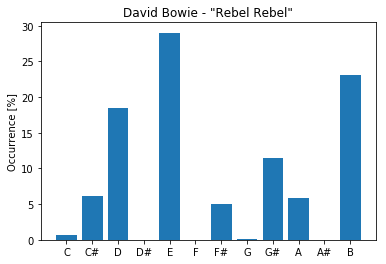

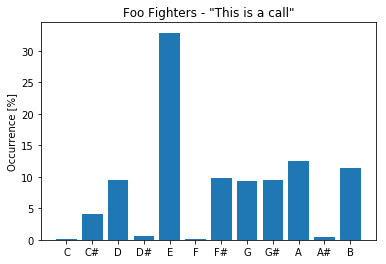

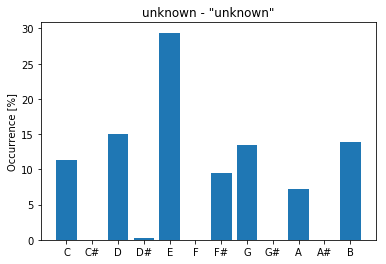

In [7]:
# array of random song indexes
sample_size = 3
displayed_songs_indexes = [rand.randint(0,len(songs_df)) for i in range(sample_size)]

# bar labels
note_names = ('C','C#','D','D#','E','F','F#','G','G#','A','A#','B')

# repeat for each song
for ind in displayed_songs_indexes:
    
    # create array of values
    note_occurrence = []
    for i in range(18,30):
        note_occurrence.append(songs_df.iat[ind,i])
    
    y_pos = np.arange(len(note_names))
    
    # plot the values as a bar chart
    plt.bar(y_pos, note_occurrence, align='center')
    plt.xticks(y_pos, note_names)
    
    # set y label and chart title
    plt.ylabel('Occurrence [%]')
    plt.title(f'{songs_df.iat[ind,0]} - \"{songs_df.iat[ind,1]}\"')

    # display the chart
    plt.show()

### Save dataframe as .csv

In [8]:
songs_df.to_csv ('songs.csv', index = None, header=True)